In [61]:
import cv2 

In [62]:
import matplotlib.pyplot as plt

In [63]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [64]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [65]:
classLables = [] #empty list of python
file_name= 'Lables.txt'
with open(file_name,'rt') as fpt:
    classLables = fpt.read().rstrip('\n').split('\n')
    #classLables.append(fpt.read())

In [66]:
print(classLables)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [67]:
print(len(classLables))

80


In [68]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2=127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilnet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 00000215AAB61390>

In [69]:
img = cv2.imread('exm1.jpg')

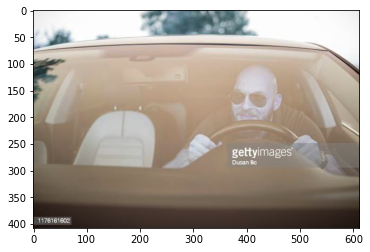

In [70]:
plt.imshow(img)

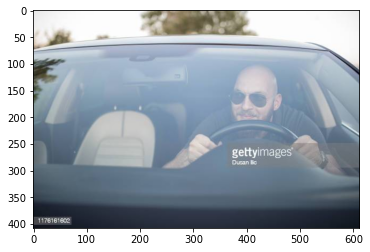

In [71]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [72]:
ClassIndex , confidece, bbox = model.detect(img, confThreshold=0.5)

In [73]:
print(ClassIndex)

[[1]
 [3]]


In [74]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y),(x+w , y+h),(255,0,0),2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness=1)
    cv2.rectangle(img, boxes,(255, 0, 0), 2)
    cv2.putText(img, classLables[ClassInd-1] , (boxes[0]+10,boxes[1]+40) , font, fontScale = font_scale, color = (0,255,0), thickness=3)


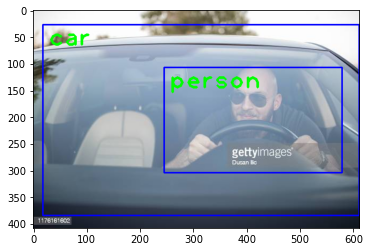

In [75]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))